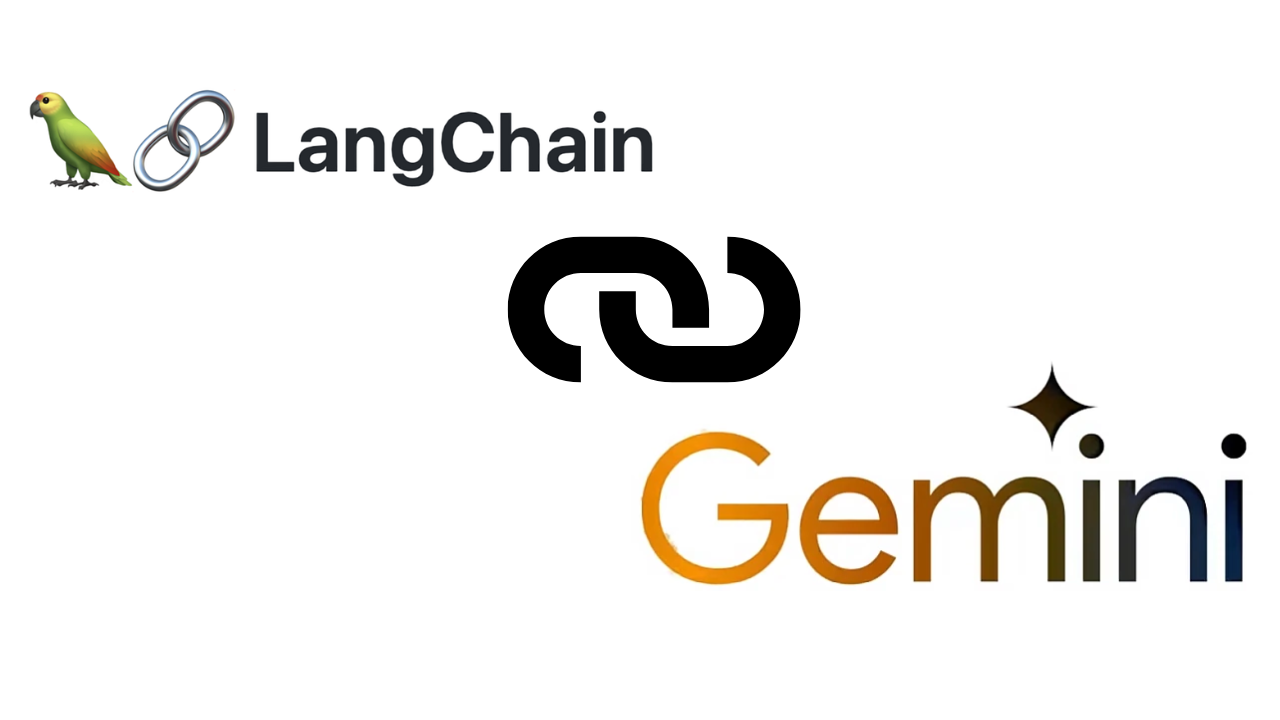

In [1]:
!pip install -q langchain_experimental langchain_core
!pip install -q google-generativeai==0.3.1
!pip install -q google-ai-generativelanguage==0.4.0
!pip install -q langchain-google-genai
!pip install -q "langchain[docarray]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.0/163.0 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.1/809.1 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.3/215.3 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 9.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
!pip show langchain langchain-core

Name: langchain
Version: 0.0.350
Summary: Building applications with LLMs through composability
Home-page: https://github.com/langchain-ai/langchain
Author: 
Author-email: 
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: aiohttp, async-timeout, dataclasses-json, jsonpatch, langchain-community, langchain-core, langsmith, numpy, pydantic, PyYAML, requests, SQLAlchemy, tenacity
Required-by: langchain-experimental
---
Name: langchain-core
Version: 0.1.1
Summary: Building applications with LLMs through composability
Home-page: https://github.com/langchain-ai/langchain
Author: 
Author-email: 
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: anyio, jsonpatch, langsmith, packaging, pydantic, PyYAML, requests, tenacity
Required-by: langchain, langchain-community, langchain-experimental, langchain-google-genai


In [3]:
import os
import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown

os.environ['GOOGLE_API_KEY'] = "API-KEY-FREE-YEAH"

genai.configure(api_key=os.environ['GOOGLE_API_KEY'])

In [4]:
models = [m for m in genai.list_models()]

In [5]:
models

[Model(name='models/chat-bison-001',
       base_model_id='',
       version='001',
       display_name='PaLM 2 Chat (Legacy)',
       description='A legacy text-only model optimized for chat conversations',
       input_token_limit=4096,
       output_token_limit=1024,
       supported_generation_methods=['generateMessage', 'countMessageTokens'],
       temperature=0.25,
       top_p=0.95,
       top_k=40),
 Model(name='models/text-bison-001',
       base_model_id='',
       version='001',
       display_name='PaLM 2 (Legacy)',
       description='A legacy model that understands text and generates text as an output',
       input_token_limit=8196,
       output_token_limit=1024,
       supported_generation_methods=['generateText', 'countTextTokens', 'createTunedTextModel'],
       temperature=0.7,
       top_p=0.95,
       top_k=40),
 Model(name='models/embedding-gecko-001',
       base_model_id='',
       version='001',
       display_name='Embedding Gecko',
       description='Obtai

In [6]:
# Generate Text

prompt = "Tell about deadlist Sea Monster any two and proof for existance"

model = genai.GenerativeModel('gemini-pro')

response = model.generate_content(prompt)
Markdown(response.text)

1. **Megalodon (Otodus Megalodon)**

* **Size:** Up to 59 feet (18 meters) long
* **Weight:** Up to 100 tons
* **Diet:** Whales, seals, and other marine mammals
* **Extinction:** Approximately 2.6 million years ago

**Proof for Existence:**

* Fossilized teeth and vertebrae have been found all over the world, suggesting that megalodon was a widespread predator.
* Whale bones from the Miocene and Pliocene epochs often show distinctive bite marks that are consistent with those of megalodon.
* Scientists have also found fossilized megalodon coprolites (fossilized poop), which contain the bones of its prey.

2. **Livyatan Melvillei**

* **Size:** Up to 57 feet (17 meters) long
* **Weight:** Up to 50 tons
* **Diet:** Whales, seals, and other marine mammals
* **Extinction:** Approximately 12 million years ago

**Proof for Existence:**

* The most complete skeleton of Livyatan melvillei was discovered in Peru in 2008. It is now on display at the Natural History Museum in Lima, Peru.
* Other fossils of Livyatan melvillei have been found in North America, South America, and Europe.
* Like megalodon, fossilized whale bones from the Miocene epoch often show distinctive bite marks that are consistent with those of Livyatan melvillei.

## Google's Gemini with Langchain

In [7]:
print("Basic LLM Chain")

Basic LLM Chain


In [8]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(
    model="gemini-pro",
    temperature=0.7
)

result = llm.invoke("What is extact location of Titanic ship?")

Markdown(result.content)

The exact location of the Titanic shipwreck is:

- Latitude: 41° 43' 32" N
- Longitude: 49° 56' 49" W

This position is approximately 1,240 nautical miles (2,300 kilometers) east-southeast of Newfoundland, Canada, and about 370 miles (600 kilometers) south of the Grand Banks of Newfoundland.

The wreck of the Titanic lies on the seabed at a depth of approximately 12,415 feet (3,784 meters). It is split into two main sections, the bow and the stern, which are separated by a distance of about 1,970 feet (600 meters).

The exact location of the Titanic was first determined in 1985 by a joint French-American expedition led by Dr. Robert Ballard and Jean-Louis Michel. The expedition used a combination of sonar technology and a remotely operated vehicle (ROV) to locate and survey the wreck.

Since then, several other expeditions have visited the Titanic, including the 2010 expedition led by filmmaker James Cameron, which captured the first high-definition footage of the wreck.

In [9]:
for chunk in llm.stream("Write a famous titanic movie song."):
  print(chunk.content)
  print("---"*100)

(Verse 1)
In shadows of the night, a ship sets sail
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

With hearts entwined, a love that won't fail
A maiden voyage, a destiny unknown
Titanic, a legend to be shown

(Chorus
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
)
Oh, Titanic, sailing through the sea
A symphony of love, a tragic decree
With Rose and Jack, their passion takes flight
In this grand ship, they find their guiding light

(Verse 2)
Amidst the opulence, a world unfolds
Where 

# Basic Multi Chain

In [10]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from langchain.prompts import ChatPromptTemplate
from langchain.schema.output_parser import StrOutputParser

In [11]:
model = ChatGoogleGenerativeAI(
    model="gemini-pro",
    temperature=0.7
)

In [12]:
prompt = ChatPromptTemplate.from_template(
    "Tell me a short facts about {topic} return in proper points"
)

output_parsers = StrOutputParser()

In [13]:
chain = prompt | model | output_parsers

In [14]:
chain.invoke({"topic":"Large Language Model"})

'- **Data-driven:** LLMs are trained on massive datasets of text and code, allowing them to learn patterns and relationships in language.\n- **Generative:** LLMs can generate text that is both coherent and grammatically correct, making them useful for a variety of tasks such as writing articles, creating dialogue, and translating languages.\n- **Contextual:** LLMs take into account the context of the input they receive, allowing them to generate text that is relevant and responsive.\n- **Transfer learning:** LLMs can be fine-tuned on specific tasks or domains, allowing them to adapt to new scenarios quickly and efficiently.\n- **Scalability:** LLMs can be scaled up to process larger amounts of data, resulting in improved performance and accuracy.\n- **Unsupervised learning:** LLMs are typically trained using unsupervised learning methods, meaning they do not require labeled data.\n- **Attention mechanisms:** LLMs often utilize attention mechanisms, which allow them to focus on specific

# More Complicated Chain - Mini RAG

In [15]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from langchain.vectorstores import DocArrayInMemorySearch

In [16]:
model = ChatGoogleGenerativeAI(
    model="gemini-pro",
    temperature=0.7
)

In [17]:
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")

In [18]:
vectorstore = DocArrayInMemorySearch.from_texts(
    ["Gemini Pro is a Large Language Model was made by GoogleDeepMind",
     "Gemini can be either a star sign or a name of a series of language models",
     "A Language model is trained by predicting the next token",
     "LLMs can easily do a variety of NLP tasks as well as text generation"],

    embedding=embeddings
)

In [19]:
retriever = vectorstore.as_retriever()

In [20]:
retriever.get_relevant_documents("what is Gemini?")

[Document(page_content='Gemini can be either a star sign or a name of a series of language models'),
 Document(page_content='Gemini Pro is a Large Language Model was made by GoogleDeepMind'),
 Document(page_content='A Language model is trained by predicting the next token'),
 Document(page_content='LLMs can easily do a variety of NLP tasks as well as text generation')]

In [21]:
retriever.get_relevant_documents("what is gemini pro?")

[Document(page_content='Gemini Pro is a Large Language Model was made by GoogleDeepMind'),
 Document(page_content='Gemini can be either a star sign or a name of a series of language models'),
 Document(page_content='A Language model is trained by predicting the next token'),
 Document(page_content='LLMs can easily do a variety of NLP tasks as well as text generation')]

In [22]:
template = """Answer the question a a full sentence, based only on the following context:
{context}

Return you answer in three back ticks

Question: {question}
"""

prompt = ChatPromptTemplate.from_template(template)

In [23]:
from langchain.schema.runnable import RunnableMap

In [25]:
retriever.get_relevant_documents("Who made Gemini pro?")

[Document(page_content='Gemini Pro is a Large Language Model was made by GoogleDeepMind'),
 Document(page_content='Gemini can be either a star sign or a name of a series of language models'),
 Document(page_content='A Language model is trained by predicting the next token'),
 Document(page_content='LLMs can easily do a variety of NLP tasks as well as text generation')]

In [26]:
chain = RunnableMap({
    "context":lambda x: retriever.get_relevant_documents(x['question']),
    "question":lambda x: x['question']
}) | prompt | model | output_parsers

In [27]:
chain.invoke({'question':'Who created Gemini pro?'})

'`GoogleDeepMind created Gemini pro.`'

# PAL Chain

In [28]:
from langchain_experimental.pal_chain import PALChain
from langchain.chains.llm import LLMChain

In [29]:
model = ChatGoogleGenerativeAI(
    model="gemini-pro",
    temperature=0
)

In [30]:
pal_chain = PALChain.from_math_prompt(model,verbose=True)

In [31]:
question="There are 18 pencils in a box. If you give away 7 pencils, how many pencils are left?"

In [32]:
pal_chain.invoke(question)



> Entering new PALChain chain...


def solution():
    """There are 18 pencils in a box. If you give away 7 pencils, how many pencils are left?"""
    pencils_initial = 18
    pencils_given_away = 7
    pencils_left = pencils_initial - pencils_given_away
    result = pencils_left
    return result

> Finished chain.


{'question': 'There are 18 pencils in a box. If you give away 7 pencils, how many pencils are left?',
 'result': '11'}

In [33]:
question = "If you wake up at 7:00 a.m. and it takes you 1 hour and 30 minutes to get ready \
 and walk to school, at what time will you get to school?"

pal_chain.invoke(question)



> Entering new PALChain chain...
def solution():
    """If you wake up at 7:00 a.m. and it takes you 1 hour and 30 minutes to get ready  and walk to school, at what time will you get to school?"""
    wake_up_time = 7
    hours_to_get_ready = 1
    minutes_to_get_ready = 30
    total_time_to_get_ready = hours_to_get_ready + minutes_to_get_ready / 60
    arrival_time = wake_up_time + total_time_to_get_ready
    result = arrival_time
    return result

> Finished chain.


{'question': 'If you wake up at 7:00 a.m. and it takes you 1 hour and 30 minutes to get ready  and walk to school, at what time will you get to school?',
 'result': '8.5'}

# Multi Modal

In [35]:
import requests
from IPython.display import Image

In [36]:
image_url = "https://akm-img-a-in.tosshub.com/indiatoday/images/story/202311/virat-kohli-had-the-belief-of-going-past-sachin-tendulkar-robin-uthappa-courtesy-ap-183615394-16x9_0.jpg?VersionId=pby0iv1p8US0htw.hqauHAl4mS4_jtvN&size=690:388"

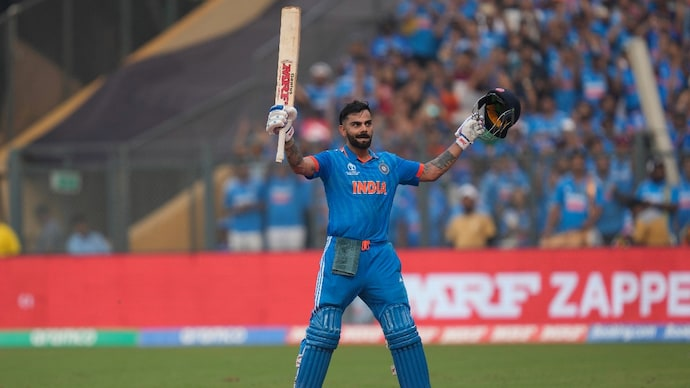

In [40]:
content = requests.get(image_url).content
Image(content,width=650)

In [41]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

In [42]:
llm = ChatGoogleGenerativeAI(
    model="gemini-pro-vision"
)

In [43]:
message = HumanMessage(
    content=[
        {
            "type":"text",
            "text":"What's in this Image and Tell about that Person",
        },
        {
            "type":"image_url",
            "image_url":image_url
        },
    ]
)

In [44]:
llm.invoke([message])

AIMessage(content=' This is a picture of Virat Kohli, an Indian cricketer who is the current captain of the Indian national team. He is considered one of the best batsmen in the world and is known for his aggressive batting style. He has scored over 20,000 runs in international cricket, including 70 centuries. He is also the fastest batsman to reach 10,000 ODI runs.')